In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df1 = pd.read_csv('./Datasets/adult.data', skipinitialspace=True)
df2 = pd.read_csv('./Datasets/adult.test', skipinitialspace=True)

df2["income-classify"] = df2["income-classify"].replace(["<=50K.", ">50K."], ["<=50K", ">50K"])

df = df1.append(df2, ignore_index=True)

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-classify
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income-classify    object
dtype: object

In [5]:
pd.value_counts(df['income-classify'])

<=50K    37155
>50K     11687
Name: income-classify, dtype: int64

In [6]:
df.describe().round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,1079.07,87.5,40.42
std,13.71,105604.03,2.57,7452.02,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,99999.00,4356.0,99.00


In [7]:
df.groupby('income-classify').mean().round(2).reset_index().rename(columns={'age':'Avg age',\
                                                                           'fnlwgt':'Avg fnlwgt',\
                                                                           'education-num':'Avg education-num',\
                                                                           'capital-gain':'Avg capital-gain',\
                                                                           'capital-loss':'Avg capital-loss',\
                                                                           'hours-per-week':'Avg hours-per-week'})

,income-classify,Avg age,Avg fnlwgt,Avg education-num,Avg capital-gain,Avg capital-loss,Avg hours-per-week
0,<=50K,36.87,190039.57,9.6,147.01,54.15,38.84
1,>50K,44.28,188470.57,11.6,4042.24,193.53,45.45


In [8]:
df.groupby([df['education-num'],df['education']])\
['age','hours-per-week'].mean().round(2).\
rename(columns={'age':'Avg age',\
                'hours-per-week':'Avg hours-per-week'})

,,Avg age,Avg hours-per-week
education-num,education,,
1,Preschool,42.20,36.57
2,1st-4th,46.64,38.76
3,5th-6th,43.59,38.92
4,7th-8th,49.53,39.00
5,9th,40.90,38.36
6,10th,37.90,36.99
7,11th,32.14,33.95
8,12th,32.24,35.37
9,HS-grad,39.07,40.64


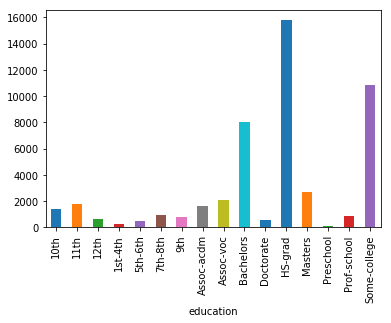

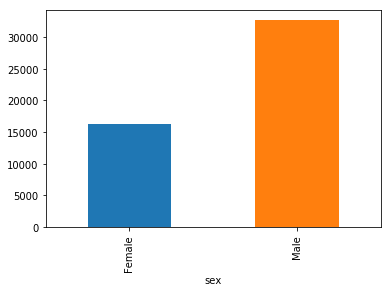

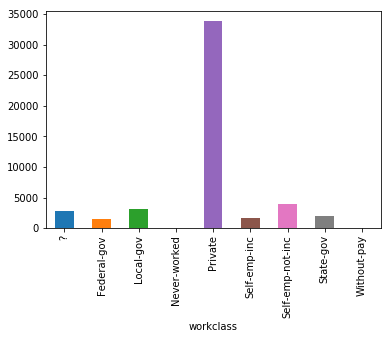

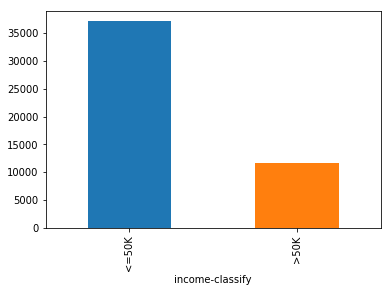

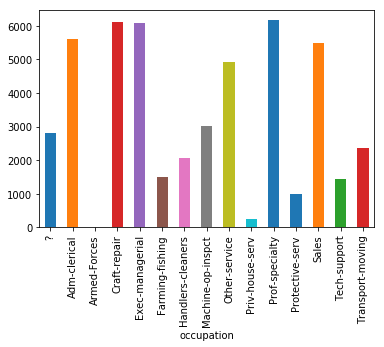

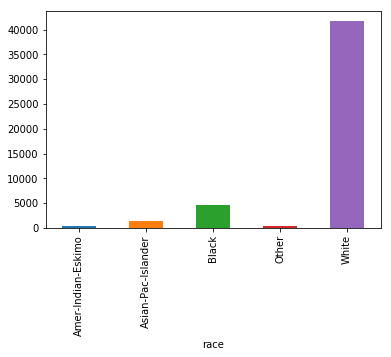

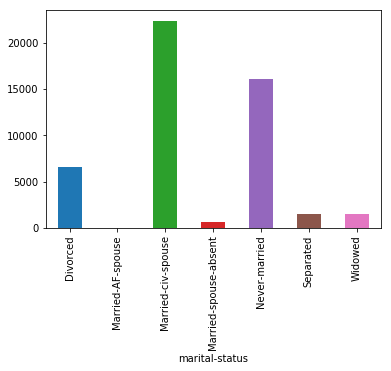

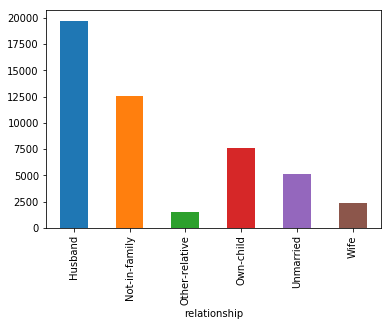

In [9]:
# plot the distribution of education, sex, workclass, income-classify, 
#occupation, race, marital-status and relationship

plt.figure()
df.groupby(['education']).size().plot(kind='bar')

plt.figure()
df.groupby(['sex']).size().plot(kind='bar')

plt.figure()
df.groupby(['workclass']).size().plot(kind='bar')

plt.figure()
df.groupby(['income-classify']).size().plot(kind='bar')

plt.figure()
df.groupby(['occupation']).size().plot(kind='bar')

plt.figure()
df.groupby(['race']).size().plot(kind='bar')

plt.figure()
df.groupby(['marital-status']).size().plot(kind='bar')

plt.figure()
df.groupby(['relationship']).size().plot(kind='bar')

Text(0.5,1,'Relationship between age and income')

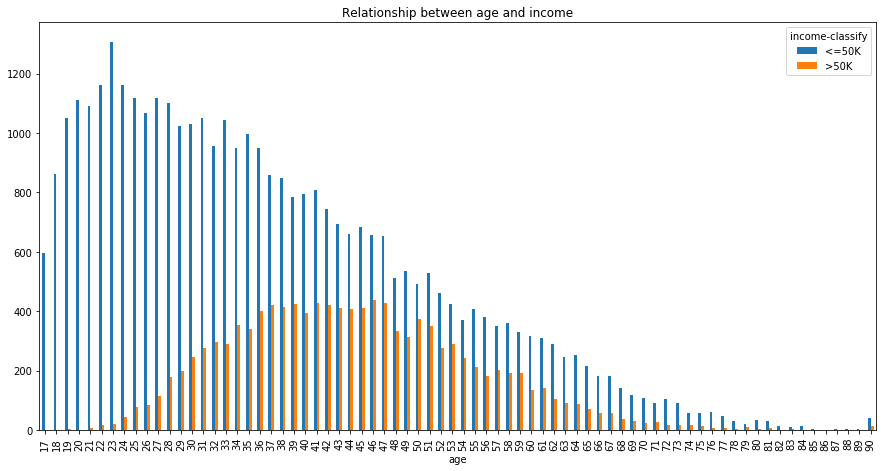

In [10]:
# age vs income
df.groupby(['age', 'income-classify']).size().unstack().plot(kind='bar', figsize=(15, 7.5))
plt.title('Relationship between age and income')

Text(0.5,1,'Relationship between working hours and income')

<Figure size 432x288 with 0 Axes>

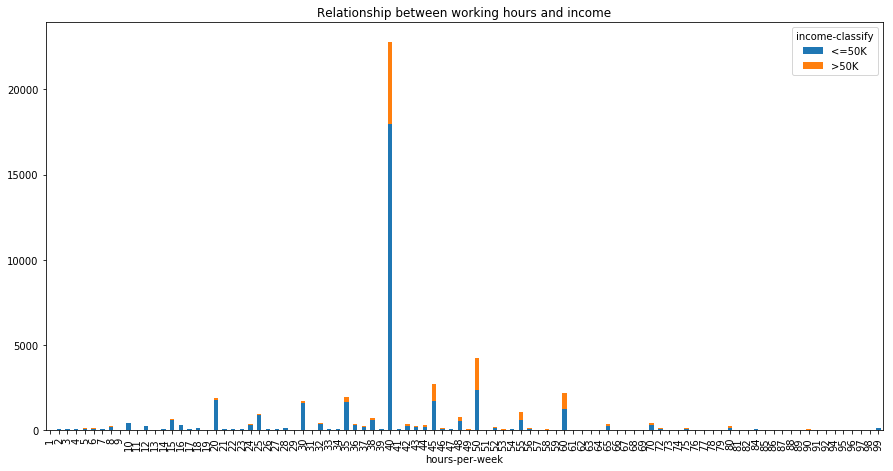

In [11]:
plt.figure()
df.groupby(['hours-per-week', 'income-classify']).size().unstack().plot(kind='bar', figsize=(15, 7.5), stacked = True)
plt.title('Relationship between working hours and income')

Text(0.5,1,'Relationship between education and income')

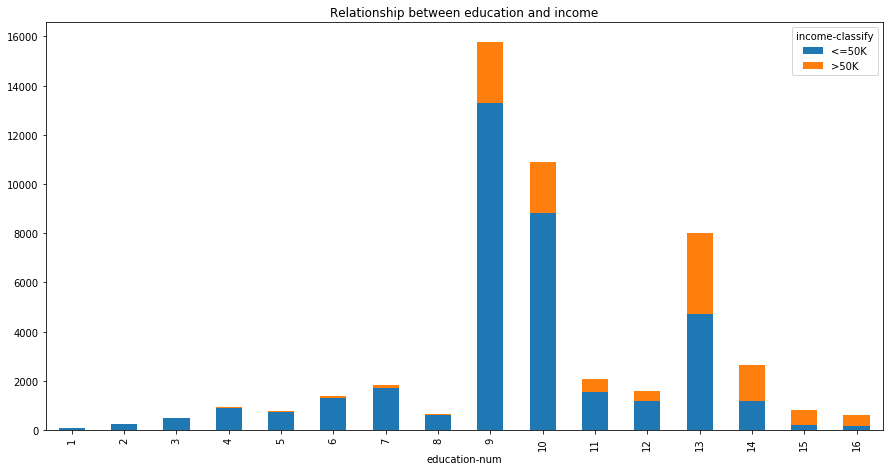

In [12]:
# education vs income
df.groupby(['education-num', 'income-classify']).size().unstack().plot(kind='bar', figsize=(15, 7.5),stacked=True)
plt.title('Relationship between education and income')

Text(0.5,1,'Relationship between gender and income')

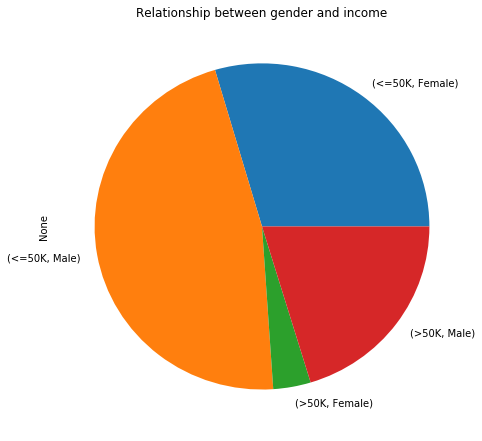

In [13]:
# sex vs income
df.groupby(['income-classify', 'sex']).size().plot(kind='pie', figsize=(7.5, 7.5))
plt.title('Relationship between gender and income')

Text(0.5,1,'Relationship between education and working hours')

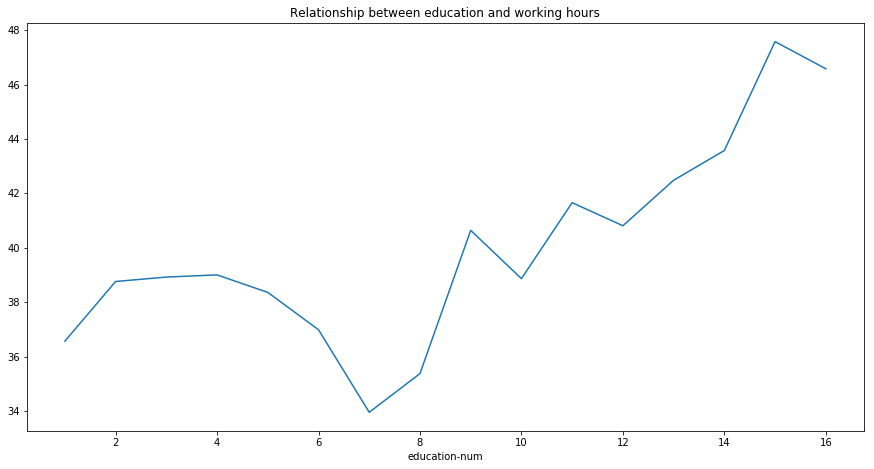

In [14]:
# education num vs avg hours per week
df.groupby(['education-num'])['hours-per-week'].mean().plot(kind='line', figsize=(15, 7.5))
plt.title('Relationship between education and working hours')

Text(0.5,1,'Relationship between average working hours')

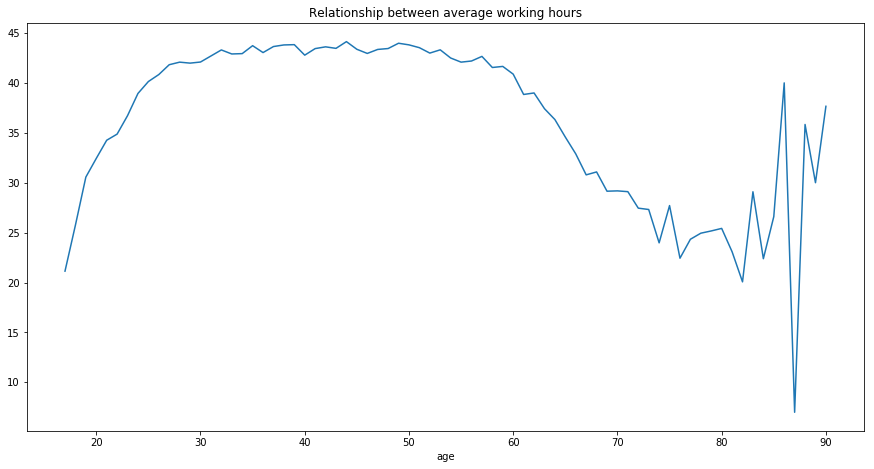

In [15]:
# age vs avg hours per week
df.groupby(['age'])['hours-per-week'].mean().plot(kind='line', figsize=(15, 7.5))
plt.title('Relationship between average working hours')

Text(0.5,1,'Relationship between race and average working hours')

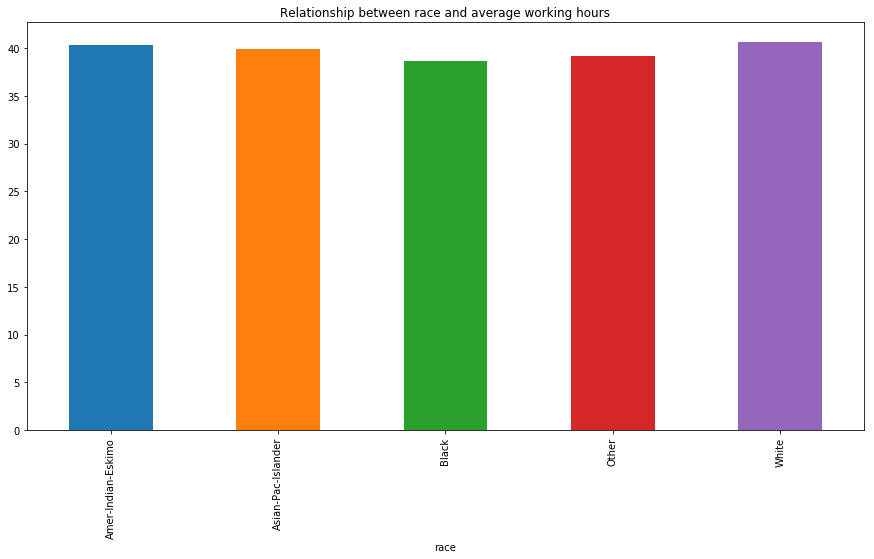

In [16]:
# race vs avg hours per week
df.groupby(['race'])['hours-per-week'].mean().plot(kind='bar', figsize=(15, 7.5))
plt.title('Relationship between race and average working hours')

Text(0.5,1,'Relationship between race and income')

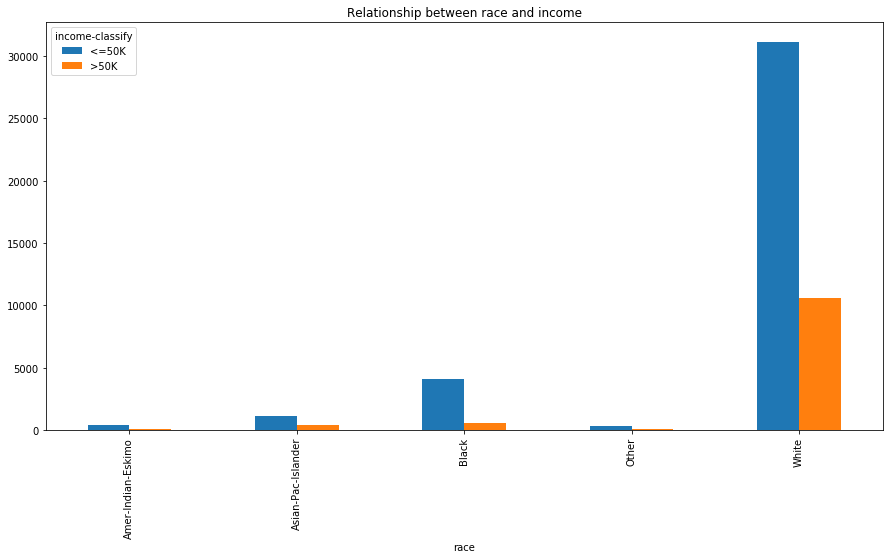

In [17]:
# race vs income
df.groupby(['race', 'income-classify']).size().unstack().plot(kind='bar', figsize=(15, 7.5))
plt.title('Relationship between race and income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1A9510588>,
      dtype=object)

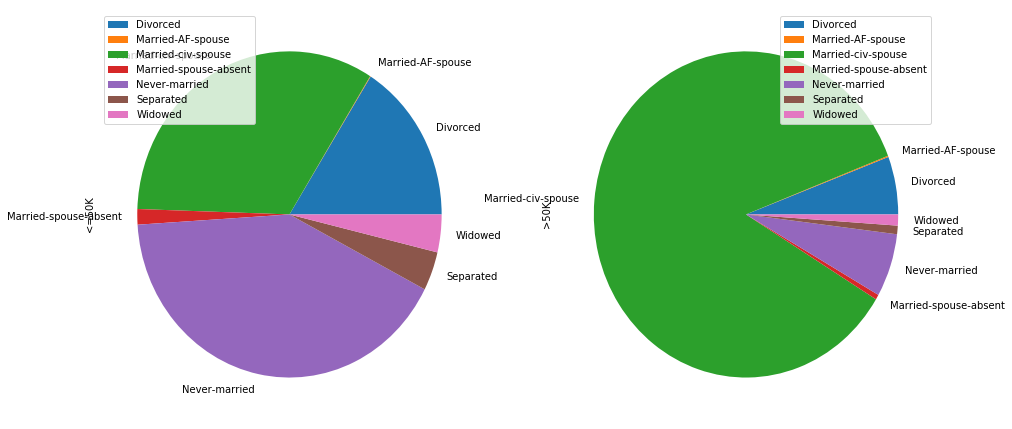

In [18]:
df.groupby(['marital-status', 'income-classify']).size().unstack().plot(kind='pie', figsize=(15, 7.5), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1A9AF74E0>,
      dtype=object)

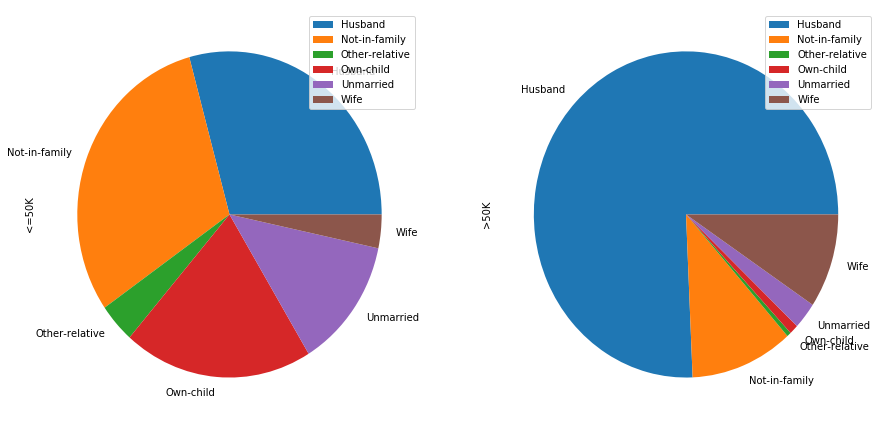

In [19]:
df.groupby(['relationship', 'income-classify']).size().unstack().plot(kind='pie', figsize=(15, 7.5), subplots=True)

##### Temporary variable used to identify how many missing values

In [20]:
# MisValTemp = df.replace('?', np.NaN)

In [21]:
# MisValTemp

In [22]:
# MisValTemp.dropna(inplace=True)
# len(MisValTemp)

##### Temporary variable used to identify how many extreme values

In [42]:
# ExtrValTemp = df[(df['age'] < 74)]

In [49]:
# len(ExtrValTemp)

In [46]:
# ExtrValTemp = df[(df['hours-per-week'] >= 8.5) & (df['hours-per-week'] <= 72.4)]

In [48]:
# len(ExtrValTemp)

##### Temporary variable used to identify how many extreme values

In [50]:
# DupValTemp = df.drop_duplicates()

In [52]:
# len(DupValTemp)